<a href="https://colab.research.google.com/github/Sonarajan04/cognoriseinfotech/blob/main/task2_email_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [5]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
df.duplicated().any()

True

In [7]:
df.drop_duplicates(inplace=True)

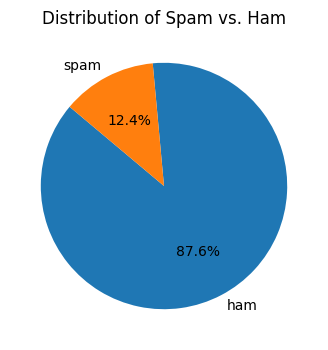

In [8]:
category= df['Category'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.pie(category, labels=category.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.show()

In [9]:
df['Category']=df['Category'].map({'ham':1,'spam':-1})

In [10]:
email=df.Message

In [11]:
#removing special charactors
email=email.str.replace('[^a-zA-Z0-9]+',' ')
email.head(5)

<ipython-input-11-99b1dd80f573>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  email=email.str.replace('[^a-zA-Z0-9]+',' ')


0    Go until jurong point crazy Available only in ...
1                             Ok lar Joking wif u oni 
2    Free entry in 2 a wkly comp to win FA Cup fina...
3         U dun say so early hor U c already then say 
4    Nah I don t think he goes to usf he lives arou...
Name: Message, dtype: object

## stemming

In [12]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()

In [13]:
email=email.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x)]).apply(lambda token:' '.join(token))
email.tail()

5567    this is the 2nd time we have tri 2 contact u u...
5568                        will b go to esplanad fr home
5569       piti was in mood for that so ani other suggest
5570    the guy did some bitch but i act like i d be i...
5571                              rofl it true to it name
Name: Message, dtype: object

## removing stopwords

In [14]:
#removing stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
email=email.apply(lambda x:[token for token in tk.tokenize(x) if token not in sw]).apply(lambda token:' '.join(token))
email.head(4)

0    go jurong point crazi avail onli bugi n great ...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkts 2...
3                  u dun say earli hor u c alreadi say
Name: Message, dtype: object

## vectorization

In [16]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
X=vector.fit_transform(email)
print(X)
vector.get_feature_names_out()
X.shape

  (0, 6859)	0.19069586248700188
  (0, 1100)	0.3450190381345442
  (0, 3110)	0.16134886390559058
  (0, 1876)	0.29100554670494505
  (0, 1644)	0.3292211046248747
  (0, 3839)	0.29100554670494505
  (0, 7031)	0.24082752642660438
  (0, 3148)	0.1922091594193073
  (0, 1646)	0.29100554670494505
  (0, 4704)	0.16738409031859047
  (0, 1287)	0.26163671427700363
  (0, 2080)	0.2665133829982026
  (0, 5004)	0.23579311458259963
  (0, 3729)	0.3450190381345442
  (0, 3071)	0.13800326020060405
  (1, 4702)	0.5626506023884165
  (1, 6954)	0.4431305910487438
  (1, 3696)	0.48021471277676236
  (1, 3870)	0.41890982206966465
  (1, 4676)	0.2845487120249123
  (2, 380)	0.14907578714152483
  (2, 80)	0.2366594830437332
  (2, 1172)	0.1642851863233398
  (2, 5263)	0.15868027695663864
  (2, 6585)	0.12330743338314715
  :	:
  (5152, 4704)	0.1731596960654938
  (5153, 2614)	0.6649547971340279
  (5153, 2897)	0.5729356742106342
  (5153, 3356)	0.3762521834249489
  (5153, 3071)	0.29667174697501736
  (5154, 4956)	0.5957365475574639
  

(5157, 7180)

In [17]:
y=df['Category']
y.head()

0    1
1    1
2   -1
3    1
4    1
Name: Category, dtype: int64

## splitting

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

## model creation

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [20]:
knn=KNeighborsClassifier()
adc=AdaBoostClassifier(random_state=1)
lr=LogisticRegression()
rfc=RandomForestClassifier(random_state=1)

In [21]:
from sklearn.metrics import classification_report

In [22]:
lst1=[knn,adc,lr,rfc]
for i in lst1:
  print('**********',i,'**********')
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))

********** KNeighborsClassifier() **********
              precision    recall  f1-score   support

          -1       1.00      0.22      0.37       201
           1       0.90      1.00      0.95      1347

    accuracy                           0.90      1548
   macro avg       0.95      0.61      0.66      1548
weighted avg       0.91      0.90      0.87      1548

********** AdaBoostClassifier(random_state=1) **********
              precision    recall  f1-score   support

          -1       0.97      0.82      0.89       201
           1       0.97      1.00      0.98      1347

    accuracy                           0.97      1548
   macro avg       0.97      0.91      0.94      1548
weighted avg       0.97      0.97      0.97      1548

********** LogisticRegression() **********
              precision    recall  f1-score   support

          -1       0.96      0.57      0.72       201
           1       0.94      1.00      0.97      1347

    accuracy                         

In [23]:
#random forest gives the highest accuracy
y_new=rfc.predict(vector.transform(['hello']))
y_new

array([1])

## wordcloud

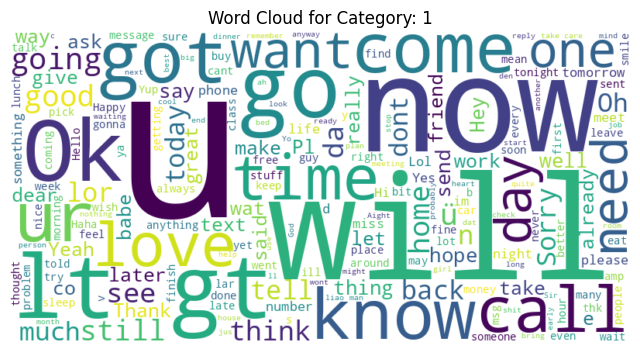

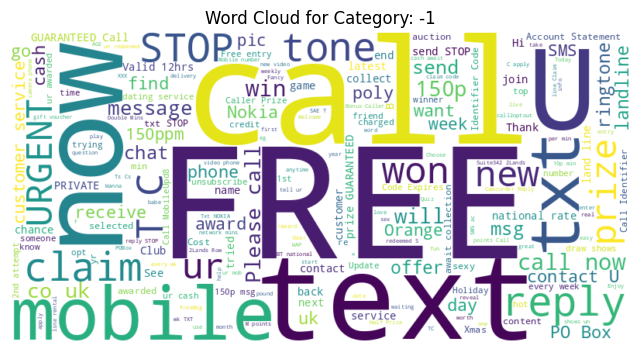

In [24]:
from wordcloud import WordCloud
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]
    text = ' '.join(filtered_df['Message'])
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()